In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data_test=pd.read_csv("C:/Users/91984/Downloads/test_data_evaluation_part2.csv")
data_train=pd.read_csv("C:/Users/91984/Downloads/train_data_evaluation_part_2.csv")

In [3]:
data_test.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
data_train.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_train.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [6]:
data_test.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [7]:
data_train.shape

(82580, 30)

In [8]:
data_test.shape

(1000, 30)

In [9]:
data_train.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_train.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data_train.dtypes

Unnamed: 0                int64
ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [12]:
data_test.dtypes

Unnamed: 0                int64
ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [13]:
data_train['SRQuietRoom']=data_train['SRQuietRoom'].astype(object)
data_test['SRQuietRoom']=data_test['SRQuietRoom'].astype(object)


In [14]:
data_train['SRNoAlcoholInMiniBar']= data_train['SRNoAlcoholInMiniBar'].astype(object)
data_test['SRNoAlcoholInMiniBar']= data_test['SRNoAlcoholInMiniBar'].astype(object)

In [15]:
data_train['SRAwayFromElevator']=data_train['SRAwayFromElevator'].astype(object)
data_test['SRAwayFromElevator']=data_test['SRAwayFromElevator'].astype(object)

In [16]:
data_train['SRNearElevator']=data_train['SRNearElevator'].astype(object)
data_test['SRNearElevator']=data_test['SRNearElevator'].astype(object)

In [17]:
data_train['SRTwinBed']=data_train['SRTwinBed'].astype(object)
data_test['SRTwinBed']=data_test['SRTwinBed'].astype(object)

In [18]:
data_train['SRKingSizeBed']=data_train['SRKingSizeBed'].astype(object)
data_test['SRKingSizeBed']=data_test['SRKingSizeBed'].astype(object)

In [19]:
data_train['SRCrib']=data_train['SRCrib'].astype(object)
data_test['SRCrib']=data_test['SRCrib'].astype(object)

In [20]:
data_train['SRShower']=data_train['SRShower'].astype(object)
data_test['SRShower']=data_test['SRShower'].astype(object)


In [21]:
data_train['SRBathtub']=data_train['SRBathtub'].astype(object)
data_test['SRBathtub']=data_test['SRBathtub'].astype(object)

In [22]:
data_train['SRMediumFloor']=data_train['SRMediumFloor'].astype(object)
data_test['SRMediumFloor']=data_test['SRMediumFloor'].astype(object)

In [23]:
data_train['SRAccessibleRoom']=data_train['SRAccessibleRoom'].astype(object)
data_test['SRAccessibleRoom']=data_test['SRAccessibleRoom'].astype(object)

In [24]:
data_train['SRLowFloor']=data_train['SRLowFloor'].astype(object)
data_test['SRLowFloor']=data_test['SRLowFloor'].astype(object)

In [25]:
data_train['SRHighFloor']=data_train['SRHighFloor'].astype(object)
data_test['SRHighFloor']=data_test['SRHighFloor'].astype(object)


# Dropping unwanted variable

In [26]:
data_train.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [27]:
data_test.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

# checking for missing value

In [28]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/len(data_train)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Age,3746,4.536207
Nationality,0,0.000000
SRNoAlcoholInMiniBar,0,0.000000
SRAwayFromElevator,0,0.000000
SRNearElevator,0,0.000000
SRTwinBed,0,0.000000
SRKingSizeBed,0,0.000000
SRCrib,0,0.000000
SRShower,0,0.000000
SRBathtub,0,0.000000


In [29]:
drop_null = missing_data[(missing_data['Percent'] <= 5) & (missing_data['Percent'] > 0) ].index
data_train = data_train.dropna(subset = drop_null)

In [30]:
data_train.isnull().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [31]:
total_test = data_test.isnull().sum().sort_values(ascending=False)
percent_test = (data_test.isnull().sum()/len(data_test)*100).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
Age,33,3.3
Nationality,0,0.0
SRNoAlcoholInMiniBar,0,0.0
SRAwayFromElevator,0,0.0
SRNearElevator,0,0.0
SRTwinBed,0,0.0
SRKingSizeBed,0,0.0
SRCrib,0,0.0
SRShower,0,0.0
SRBathtub,0,0.0


In [32]:
drop_null_test = missing_data_test[(missing_data_test['Percent'] <= 5) & (missing_data_test['Percent'] > 0) ].index
data_test = data_test.dropna(subset = drop_null_test)

In [33]:
data_test.isnull().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

# Checking for Outliers

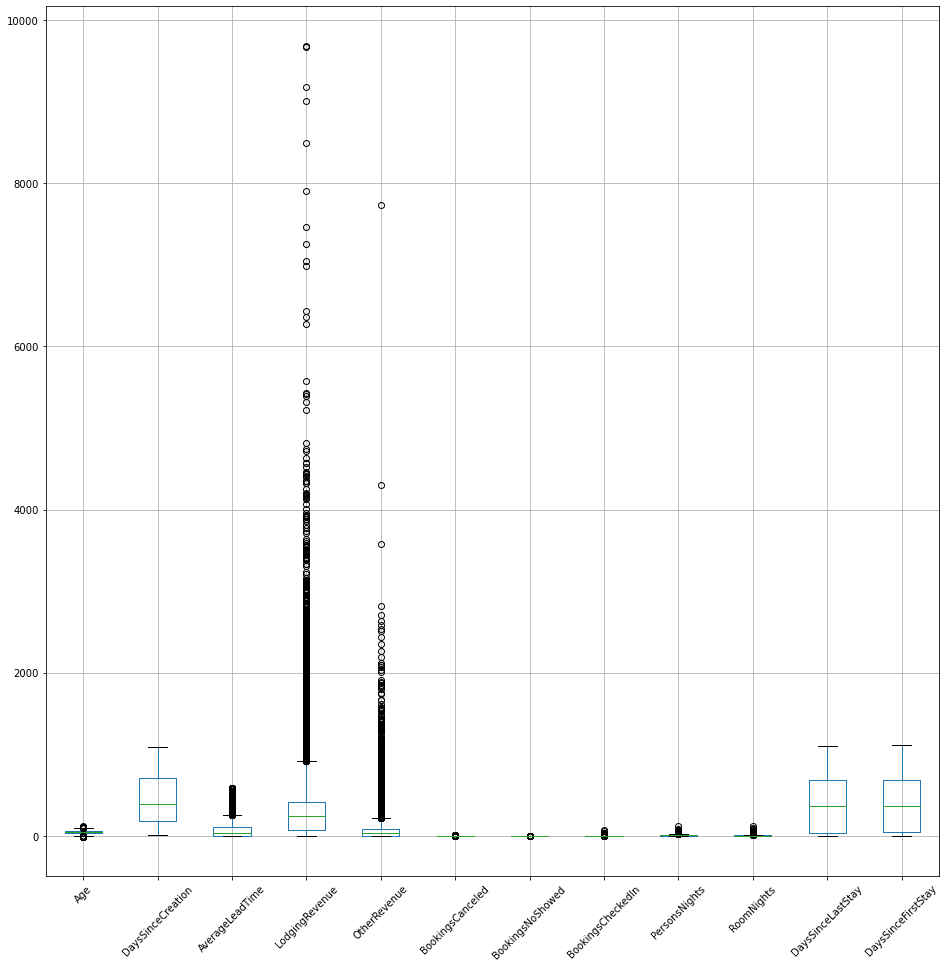

In [34]:
plt.figure(figsize=(16,16))
data_train.boxplot()
plt.xticks(rotation=45)
plt.show()

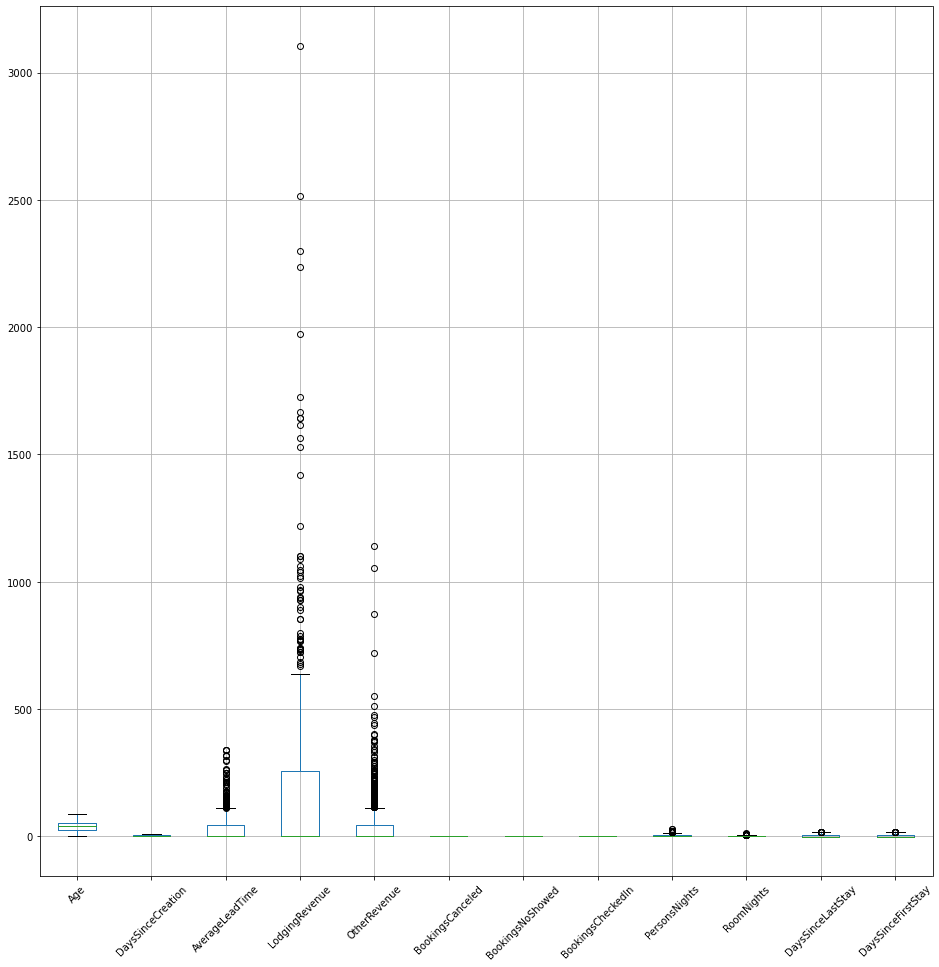

In [35]:
plt.figure(figsize=(16,16))
data_test.boxplot()
plt.xticks(rotation=45)
plt.show()

In [36]:
q1=data_train.quantile(.25)
q3=data_train.quantile(.75)
iqr=q3-q1
lower_range = q1 -(1.5 * iqr)
upper_range = q3 + (1.5 * iqr)
data_train=data_train[~((data_train<(q1 -(1.5 * iqr))) | (data_train>(q3 + (1.5 * iqr)))).any(axis=1)]

In [37]:
q1=data_test.quantile(.25)
q3=data_test.quantile(.75)
iqr=q3-q1
lower_range = q1 -(1.5 * iqr)
upper_range = q3 + (1.5 * iqr)
data_test=data_test[~((data_test<(q1 -(1.5 * iqr))) | (data_test>(q3 + (1.5 * iqr)))).any(axis=1)]

# Scaling and encoding categorial data

In [46]:
cat=data_train.select_dtypes(object)
cont=data_train.select_dtypes(np.number)

In [48]:
cont_columns=cont.columns

In [51]:

ss=StandardScaler()
cont=ss.fit_transform(cont)


In [52]:
cont

array([[ 0.94285089,  1.87939055,  0.31089244, ...,  1.54215624,
         1.88665977,  1.88665977],
       [ 0.5243595 ,  1.87939055, -0.21245351, ..., -0.58341973,
         1.87672493,  1.87672493],
       [-1.01010894,  1.87939055, -0.51150833, ...,  1.54215624,
         1.88665977,  1.88665977],
       ...,
       [-1.01010894, -1.70707731,  0.23612873, ..., -0.58341973,
        -1.70975275, -1.70975275],
       [-0.38237185, -1.70707731, -0.97504331, ..., -1.29194506,
        -1.71306437, -1.71306437],
       [ 0.3151138 , -1.70707731,  0.6249    , ...,  0.12510559,
        -1.70644114, -1.70644114]])

In [53]:
cont_train=pd.DataFrame(cont,columns=cont_columns)
cont_train

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
0,0.942851,1.879391,0.310892,-0.425576,-0.008999,0.0,0.0,0.0,1.358562,1.542156,1.886660,1.886660
1,0.524359,1.879391,-0.212454,-0.481259,-0.754588,0.0,0.0,0.0,-0.447274,-0.583420,1.876725,1.876725
2,-1.010109,1.879391,-0.511508,1.217067,0.695168,0.0,0.0,0.0,1.358562,1.542156,1.886660,1.886660
3,-1.498349,1.879391,0.355751,-0.793082,0.177398,0.0,0.0,0.0,0.154672,0.125106,1.880037,1.880037
4,0.803354,1.879391,-0.182548,-0.136025,0.425928,0.0,0.0,0.0,1.358562,1.542156,1.886660,1.886660
...,...,...,...,...,...,...,...,...,...,...,...,...
49397,-1.358852,-1.707077,-1.004949,0.125684,1.993736,0.0,0.0,0.0,1.057590,0.125106,-1.706441,-1.706441
49398,-0.661366,-1.707077,-0.122737,0.204754,-0.091842,0.0,0.0,0.0,0.756617,0.833631,-1.703130,-1.703130
49399,-1.010109,-1.707077,0.236129,-1.060360,-0.671745,0.0,0.0,0.0,-0.447274,-0.583420,-1.709753,-1.709753
49400,-0.382372,-1.707077,-0.975043,-1.343340,-1.106672,0.0,0.0,0.0,-1.350192,-1.291945,-1.713064,-1.713064


In [59]:
cat=pd.get_dummies(cat,drop_first=True)
cat.reset_index(inplace=True)

In [66]:
df_train=pd.concat([cont_train,cat],axis=1)
df_train

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor_1,SRBathtub_1,SRShower_1,SRCrib_1,SRKingSizeBed_1,SRTwinBed_1,SRNearElevator_1,SRAwayFromElevator_1,SRNoAlcoholInMiniBar_1,SRQuietRoom_1
0,0.942851,1.879391,0.310892,-0.425576,-0.008999,0.0,0.0,0.0,1.358562,1.542156,...,0,0,0,0,0,0,0,0,0,0
1,0.524359,1.879391,-0.212454,-0.481259,-0.754588,0.0,0.0,0.0,-0.447274,-0.583420,...,0,0,0,0,0,0,0,0,0,0
2,-1.010109,1.879391,-0.511508,1.217067,0.695168,0.0,0.0,0.0,1.358562,1.542156,...,0,0,0,0,1,0,0,0,0,0
3,-1.498349,1.879391,0.355751,-0.793082,0.177398,0.0,0.0,0.0,0.154672,0.125106,...,0,0,0,0,0,0,0,0,0,0
4,0.803354,1.879391,-0.182548,-0.136025,0.425928,0.0,0.0,0.0,1.358562,1.542156,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49397,-1.358852,-1.707077,-1.004949,0.125684,1.993736,0.0,0.0,0.0,1.057590,0.125106,...,0,0,0,0,1,0,0,0,0,0
49398,-0.661366,-1.707077,-0.122737,0.204754,-0.091842,0.0,0.0,0.0,0.756617,0.833631,...,0,0,0,0,0,0,0,0,0,0
49399,-1.010109,-1.707077,0.236129,-1.060360,-0.671745,0.0,0.0,0.0,-0.447274,-0.583420,...,0,0,0,0,0,0,0,0,0,0
49400,-0.382372,-1.707077,-0.975043,-1.343340,-1.106672,0.0,0.0,0.0,-1.350192,-1.291945,...,0,0,0,0,0,0,0,0,0,0


In [62]:
cat_test=data_test.select_dtypes(object)
cont_test=data_test.select_dtypes(np.number)
cont_columns_test=cont_test.columns

In [63]:
ss=StandardScaler()
cont_test=ss.fit_transform(cont_test)


In [64]:
cont_test=pd.DataFrame(cont_test,columns=cont_columns_test)
cont_test

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
0,0.484806,2.149586,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,-0.605084,-0.606655
1,-1.150840,2.149586,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,-0.605084,-0.606655
2,-1.304182,2.149586,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,-0.605084,-0.606655
3,0.229236,2.149586,-0.378890,-0.038359,-0.160833,0.0,0.0,1.416245,-0.127418,0.251680,2.384443,2.378100
4,-0.333017,2.149586,-0.245532,0.635456,0.975202,0.0,0.0,1.416245,0.232935,1.037094,2.614407,2.607696
...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.587034,-1.344149,3.621833,0.640304,-0.379301,0.0,0.0,1.416245,0.232935,0.251680,-0.145157,-0.147462
720,0.587034,-1.344149,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,-0.605084,-0.606655
721,0.842603,-1.344149,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,-0.605084,-0.606655
722,0.791490,-1.344149,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,-0.605084,-0.606655


In [65]:
cat_test=pd.get_dummies(cat_test,drop_first=True)
cat_test.reset_index(inplace=True)

df_test=pd.concat([cont_test,cat_test],axis=1)
df_test

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,MarketSegment_Direct,MarketSegment_Other,MarketSegment_Travel Agent/Operator,SRHighFloor_1,SRBathtub_1,SRCrib_1,SRKingSizeBed_1,SRTwinBed_1,SRNearElevator_1,SRQuietRoom_1
0,0.484806,2.149586,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,...,0,1,0,0,0,0,0,0,0,0
1,-1.150840,2.149586,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,...,0,1,0,0,0,0,0,0,0,0
2,-1.304182,2.149586,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,...,0,1,0,0,0,0,0,0,0,0
3,0.229236,2.149586,-0.378890,-0.038359,-0.160833,0.0,0.0,1.416245,-0.127418,0.251680,...,0,0,0,0,0,0,0,0,0,0
4,-0.333017,2.149586,-0.245532,0.635456,0.975202,0.0,0.0,1.416245,0.232935,1.037094,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.587034,-1.344149,3.621833,0.640304,-0.379301,0.0,0.0,1.416245,0.232935,0.251680,...,0,1,0,0,0,0,1,0,0,0
720,0.587034,-1.344149,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,...,0,1,0,0,0,0,1,0,0,0
721,0.842603,-1.344149,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,...,0,1,0,0,0,0,0,0,0,0
722,0.791490,-1.344149,-0.423342,-0.515039,-0.466689,0.0,0.0,-0.672067,-0.487771,-0.533734,...,0,1,0,0,0,0,1,0,0,0


# Model Building

# K Means

In [68]:

wcv=[]
for i in range(1,8):
    km=KMeans(n_clusters=i)
    km.fit(df_train)
    wcv.append(km.inertia_)


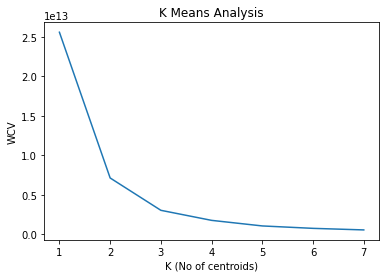

In [70]:
plt.plot(range(1, 8), wcv)
plt.xlabel('K (No of centroids)')
plt.ylabel('WCV')
plt.title('K Means Analysis')
plt.show()

In [73]:

silhouette = []

for i in range(2, 8):
    km = KMeans(n_clusters = i)
    km.fit(df_train)
    silhouette.append(silhouette_score(df_train, km.labels_))
silhouette

[0.6089591782607179,
 0.5867023270938719,
 0.564789337558198,
 0.5749876032763077,
 0.5601071117546115,
 0.5602010716329753]

In [74]:
km_best = KMeans(n_clusters = 3)
km_best.fit(df_train)

KMeans(n_clusters=3)

In [75]:
data_train['Clusters']=km_best.labels_
data_train

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Clusters
3,FRA,60.0,1095,93,240.00,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,1
5,JPN,54.0,1095,58,230.00,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,1
7,FRA,32.0,1095,38,535.00,94.0,0,0,1,10,...,0,0,0,1,0,0,0,0,0,1
9,IRL,25.0,1095,96,174.00,69.0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,1
11,FRA,58.0,1095,60,292.00,81.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82566,NLD,27.0,12,5,339.00,156.7,0,0,1,9,...,0,0,0,1,0,0,0,0,0,0
82570,ROU,37.0,12,64,353.20,56.0,0,0,1,8,...,0,0,0,0,0,0,0,0,0,0
82572,FRA,32.0,12,88,126.00,28.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
82574,PRT,41.0,12,7,75.18,7.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
